【台北大學碩士班課程】統計應用數學與計算<br>
【授課老師】汪群超<br>
【學期】1112 <br>
【主要內容】PCA、SVD 在影像上的應用<br>
【作者】711133117 陳怡升 <br>
【參考網站】[汪群超 Shallow Machine Learning Lesson 6 : PCA 、SVD 及其在影像處理的應用](https://ntpuccw.blog/python-in-learning/sml%e6%b7%ba%e5%ba%a6%e6%a9%9f%e5%99%a8%e5%ad%b8%e7%bf%92%ef%bc%9apca-%e3%80%81svd-%e5%8f%8a%e5%85%b6%e5%9c%a8%e5%bd%b1%e5%83%8f%e8%99%95%e7%90%86%e7%9a%84%e6%87%89%e7%94%a8/)

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
# from sklearn.decomposition import PCA
# import sklearn
from numpy.linalg import svd
import cv2

In [3]:
imgfile = r'C:\Course\1112ShallowMachineLearning\data'

In [2]:
imgfile = r'D:\711133117\1112ShallowMachineLearning\data'

# SVD理論

http://timbaumann.info/svd-image-compression-demo/

\begin{align}
\mathbf{X}=\sum^{p}_{k=1}\sigma_ku_kv^T_k,\;\; \sigma_1 > \sigma_2 > \ldots > \sigma_p
\end{align}

矩陣寫法

\begin{align}
\mathbf{X}_{(p\times n)} &= \mathbf{U}_{(p\times p)}\Sigma_{(p\times n)}\mathbf{V}_{(n\times n)}^T\\
\mathbf{U}^T_{(p\times p)}\mathbf{X}_{(p\times n)} &= \mathbf{U}^T\mathbf{U}\Sigma\mathbf{V}^T = \Sigma\mathbf{V}^T = \mathbf{Z}_{(p\times n)}\\
\end{align}

- $\mathbf{X}$：原始資料，$p\times n$，$n$ 為樣本數， $p$ 為特徵數
- $\mathbf{U}$：新的坐標軸，$p\times p$，在 $p$ 度空間的垂直
- $\Sigma$：對角矩陣，其他補 0
- $\mathbf{V}$

## Rank q approximation：從 p 度空間降為降到 q 度空間

\begin{align}
\mathbf{U}^T_{q(q\times p)}\mathbf{X}_{(p\times n)} &= \mathbf{U}^T_{q}\mathbf{U}\Sigma\mathbf{V}^T\\
 &= \Sigma_{q(q\times q)}\mathbf{V}^T_{q(q\times n)} = \mathbf{Z}_{q(q\times n)}
\end{align}

- $\mathbf{U}_q = \begin{bmatrix}u_1, u_2, u_3, \ldots, u_q\end{bmatrix}$，維度 $p\times q$
- $\mathbf{X}$ : 是原始的資料，維度 $p\times n$

\begin{align}
\mathbf{U}^T_q\mathbf{X} &= \Sigma_q\mathbf{V}^T_q = \mathbf{Z}_q = \begin{bmatrix}z_{1,q}, z_{2,q}, z_{3,q}, \ldots, z_{n,q}\end{bmatrix}\\
\rightarrow\mathbf{U}_q\mathbf{U}^T_q\mathbf{X} &= \mathbf{U}_q\mathbf{Z}_q\label{eq:Xq}
\end{align}

- $\mathbf{U}_q$ : 新的座標
- $\mathbf{Z}_q$ : 新的座標空間的座標值


數學式 (\ref{eq:Xq}) 中的 $\mathbf{X}$ 其實是 $\mathbf{X}_q$，並不是原始的 $\mathbf{X}$，經過轉換後還是有一定的損失，這之中的損失過程就是壓縮或加密的原理。


## 應用
### 影像壓縮：原本儲存 $p\times n$ 變成維度較小的 $\Sigma$、$u$、$v$<br>
影像壓縮的原理是儲存 $\Sigma$、$u$、$v$，而不是原本的影像，在此要注意其實影像的大小是沒有改變的，會稱之為影像壓縮是因為儲存的資料不同（原本是512*512的 pixel 變成維度較小的 $\Sigma$、$u$、$v$），其壓縮率的計算方式為
### 降維

# SVD 和 PCA 差別

兩者的理論基礎是差不多的，

\begin{align}
X_q & =U_qU^T_qX_{(p\times N)}\\
Z &=U^T_qX, U_q = \begin{bmatrix}u_1,u_2,\ldots,u_q\end{bmatrix}
\end{align}
- $\begin{bmatrix}u_1,u_2,\ldots,u_q\end{bmatrix}$ 是 $XX^T$ 的 eigenvector

\begin{align}
XX^T= \begin{bmatrix}x_1,x_2,\ldots,x_N\end{bmatrix} \begin{bmatrix}x_1\\ x_2\\ \cdots\\ x_N\end{bmatrix}
\end{align}

# 對數字 3 做研究
老師上課說可以發現
- 手寫數字3的第1個主成分都是很相似的，如果要分辨不同的手寫數字可能要取其他的主成分比較有分辨性
- 判別不同數字：第1主成分很有用

# 可以比較不同數字

# 習題 1：做阿富汗女孩和Lenna
將一張圖像 X 利用 SVD 的 Rank q approximation，能達到壓縮的目的並保持圖像的品質。比較下列幾種對於圖像矩陣 X 的重組安排，並進行 Rank q approximation，在同樣的壓縮比之下，觀察還原後的圖像品質哪個最好？能說出理由嗎？

1. X 不變

2. 將 X 以 $8\times 8$ 小圖（patch）進行切割，再將每個小圖拉成 $64\times 1$ 的向量，最後重組這些向量並排成新的 $64\times N$ 矩陣。

3. 同上，小圖大小為 $16\times 16$/per patch。

4. 同上，但分割成 $32\times 32$/per patch。

5. 其他。譬如，隨機挖取 X 裡面的 patch，可重疊，小圖大小自訂、數量隨意。

如何呈現最後的比較結果，請自行決定，譬如，將圖像並列比較。圖像可以選 Lenna， 也可以自行決定。

- 壓縮比例（Compression Ratio）：原本的圖片是 $p\times n$，計算公式是 $\frac{p*q + q*n +1 }{p* n}$
舉例來說 


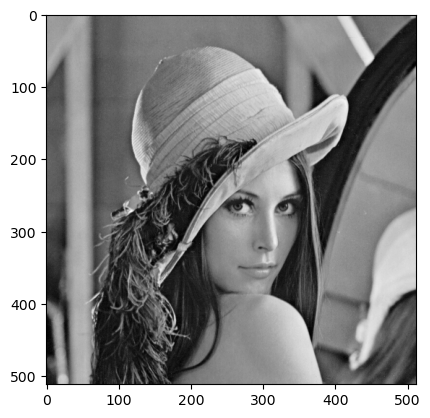

In [6]:
lenna_img = cv2.imread(imgfile + r'\lenna.png', cv2.IMREAD_GRAYSCALE)
plt.imshow(lenna_img, cmap=plt.cm.gray)
plt.show()

## 原圖

In [260]:
X = lenna_img
U, S, VT = np.linalg.svd(X, full_matrices = True)
S = np.diag(S)
p, n = X.shape
new_img_dict_orig = {}
compress = [4,8,16,32,64]
for c in compress:
    q = int(np.round((p*n-c)/(c*(p+n)),0))
    new_img_dict_orig[c] = U[:,:q] @ S[:q,:q] @ VT[:q,:]

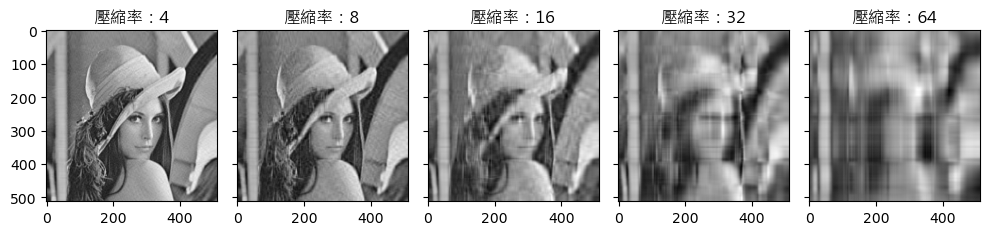

In [183]:
keyyy = new_img_dict_orig.keys()
fig, ax = plt.subplots(nrows=1, ncols=len(keyyy), sharey=True, figsize=(10,15))
for e, c in enumerate(keyyy):
    ax[e].imshow(new_img_dict_orig.get(c), cmap=plt.cm.gray)
    ax[e].set_title("壓縮率：{}".format(c), fontname="Microsoft JhengHei")
plt.tight_layout()
plt.show()

## 切割成不同大小的小圖（patch）
將 $X$ 以 $n_p\times n_p$ 小圖（patch）進行切割，再將每個小圖拉成 $n_p^2\times 1$ 的向量，重組這些向量並排成新的 $n_p^2\times N$ 矩陣，最後使用新的矩陣進行 SVD 。

以下將進行不同小圖大小和原圖的比較，將針對：
1. $X$ 不變
2. $8\times 8$
3. $16\times 16$
4. $32\times 32$

In [ ]:
int(np.round((p*n-c)/(c*(p+n)),0))

In [165]:
def compress_image(lenna_img, pn, compress):
    y, x = lenna_img.shape
    p = int(y*x/(pn*pn)); n = pn*pn
    X = np.zeros([int(y*x/(pn*pn)), pn*pn])
    for i in range(0,y//pn):
        for j in range(0,x//pn):
            X[(y//pn)*i+j,:] = lenna_img[pn*i:pn*(i+1),pn*j:pn*(j+1)].reshape((1,-1))

    U, S, VT = np.linalg.svd(X, full_matrices = True)
    S = np.diag(S)
    new_img_dict = {}
    for c in compress:
        q = int(np.round((p*n-c)/(c*(p+n)),0))
        X_q = U[:,:q] @ S[:q,:q] @ VT[:q,:]
        tmparray = np.zeros((y, x))
        for r in range(0,X_q.shape[0]):
            i = r//(y//pn); j = r%(y//pn)
            tmparray[pn*i:pn*(i+1),pn*j:pn*(j+1)] = X_q[r,:].reshape(pn,pn)
        new_img_dict[c] = tmparray
    return new_img_dict

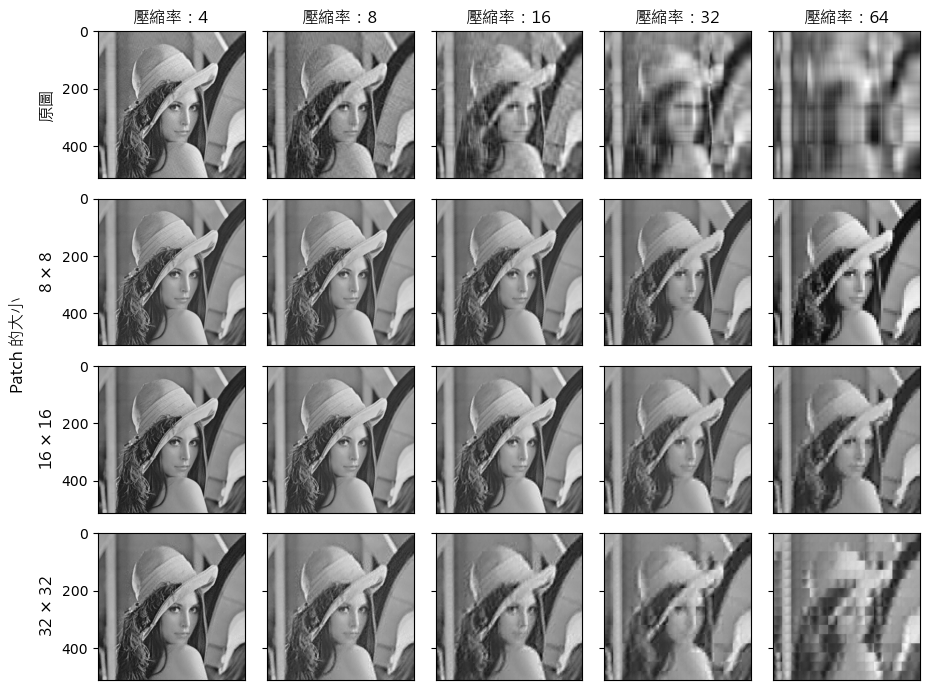

In [261]:
fig, ax = plt.subplots(nrows=4, ncols=len(new_img_dict_orig.keys()), sharex=True, sharey=True, figsize=(9.5,7))
for pn_e, pn in enumerate([1, 8 ,16 ,32]):
    new_img_dict = {}
    if pn == 1:
        new_img_dict = new_img_dict_orig
    else:
        new_img_dict = compress_image(lenna_img, pn, compress=[4,8,16,32,64])
    for e, c in enumerate(new_img_dict_orig.keys()):
        ax[pn_e, e].imshow(new_img_dict.get(c), cmap=plt.cm.gray)
        if pn_e == 0:
            ax[pn_e, e].set_title("壓縮率：{}".format(c), fontname="Microsoft JhengHei", fontsize=12)
        ax[pn_e, e].get_xaxis().set_visible(False)
        if e == 0:
            if pn==1:
                ylabel = '原圖'
            else:
                ylabel = r'{} $\times$ {}'.format(pn,pn)
            ax[pn_e, e].set_ylabel(ylabel, fontname="Microsoft JhengHei", fontsize=12)
fig.supylabel('Patch 的大小', fontname="Microsoft JhengHei")
plt.tight_layout()
plt.show()

## 阿富汗女孩

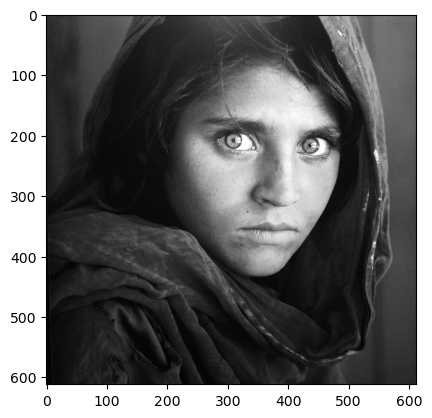

In [214]:
img = cv2.imread(imgfile + r'\green-eye-afghan-girl-national-geographic.jpg', cv2.IMREAD_GRAYSCALE)
plt.imshow(img, cmap=plt.cm.gray)
plt.show()

In [246]:
X = img
U, S, VT = np.linalg.svd(X, full_matrices = True)
S = np.diag(S)
p, n = X.shape
new_img_dict_orig = {}
compress = [8, 16, 32, 64, 128]
for c in compress:
    q = int(np.round((p*n-c)/(c*(p+n)),0))
    new_img_dict_orig[c] = U[:,:q] @ S[:q,:q] @ VT[:q,:]

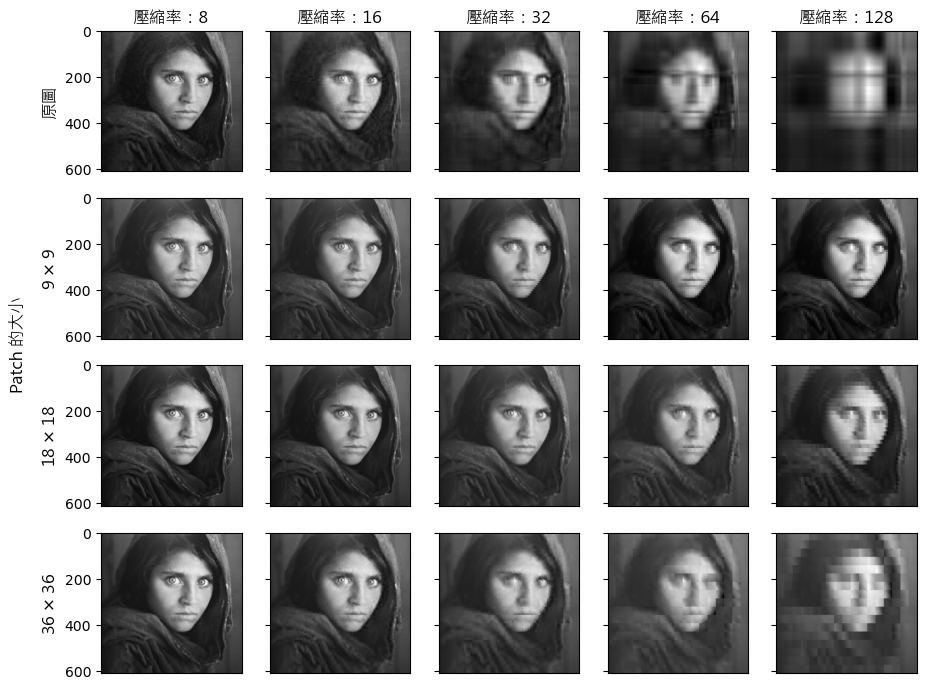

In [259]:
fig, ax = plt.subplots(nrows=4, ncols=len(new_img_dict_orig.keys()), sharex=True, sharey=True, figsize=(9.5,7))
for pn_e, pn in enumerate([1, 9, 18, 36]):
    new_img_dict = {}
    if pn == 1:
        new_img_dict = new_img_dict_orig
    else:
        new_img_dict = compress_image(img, pn, compress)
    for e, c in enumerate(new_img_dict_orig.keys()):
        ax[pn_e, e].imshow(new_img_dict.get(c), cmap=plt.cm.gray)
        if pn_e == 0:
            ax[pn_e, e].set_title("壓縮率：{}".format(c), fontname="Microsoft JhengHei", fontsize=12)
        ax[pn_e, e].get_xaxis().set_visible(False)
        if e == 0:
            if pn==1:
                ylabel = '原圖'
            else:
                ylabel = r'{} $\times$ {}'.format(pn,pn)
            ax[pn_e, e].set_ylabel(ylabel, fontname="Microsoft JhengHei", fontsize=12)
fig.supylabel('Patch 的大小', fontname="Microsoft JhengHei")
plt.tight_layout()
plt.show()

# 習題 2
處理大量影像前，有必要觀看影像圖，以確定能掌握將要處理的影像及其資料型態。以 70000 張手寫圖像為例，每個數字約 7000 字，需要寫一段程式碼來觀察這些手寫數字的影像與品質，且每次執行都能隨機觀看到不同的影像，如下圖左與圖右的影像不同。請靜下心來仔細寫這段程式碼，可以按下圖的方式呈現，或用自己的方式都歡迎。類似像這樣的程式基本功事非常重要且必要的。


In [11]:
df = pd.read_csv(datafile + r'\mnist_number.csv')
X = df.copy().iloc[:, :-1]; y = df.copy().loc[:,'anser']
print(df.shape)
df.head(5)

(70000, 785)


,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784,anser
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9


In [6]:
def montage(A, m, n, sz):
    M = np.zeros((m*sz[0], n*sz[1])) # montage image
    for i in range(0,m):
        for j in range(0,n):
            M[i*sz[0]:(i+1)*sz[0], j*sz[1]:(j+1)*sz[1]] = A.iloc[i*n+j,:].values.reshape(sz[0], sz[1])
    return M

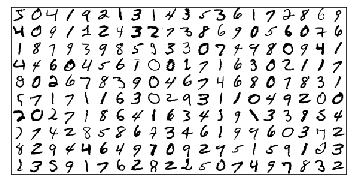

In [60]:
m, n = 10, 20
sz = np.array((28 ,28)) 
M = montage(df.iloc[:,:-1], m, n, sz)
plt.imshow(M, cmap=plt.cm.gray_r , interpolation='nearest')
plt.xticks ([]), plt.yticks ([])
plt.show()

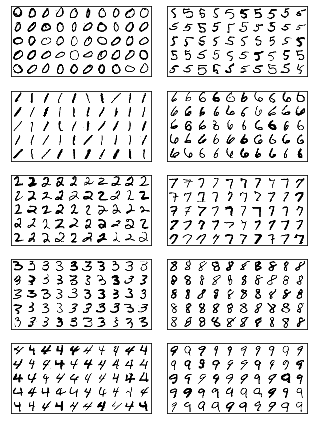

In [78]:
m = 5; n = 10
fig, axs = plt.subplots(5, 2, figsize=(4.5,6))
for e, num in enumerate(set(df['anser'])):
    sample_idx = df.index[df['anser']==num]
    want_idx = np.random.choice(sample_idx, replace=False, size=m*n) 
    A = X.loc[want_idx,:]
    M = montage(A, m, n, sz)
    ax = axs[e%5, e//5]
    ax.imshow(M, cmap=plt.cm.gray_r , interpolation='nearest')
    ax.set_xticks ([]), ax.set_yticks ([])
plt.tight_layout()
plt.show()

# 習題 3
每張大小 28×28 的手寫數字圖像 70000 張，不經壓縮前的儲存空間為 54.88 M Bytes。若進行 SVD 的 「Rank q approximation」，則壓縮倍數由 $q$ 決定。寫一支程式，當調整 $q$ 值時，可以算出壓縮的倍數，並同時顯示原圖與壓縮後還原的圖各 100 張做為比較（任選 100 張）。另外 $q$ 的選擇可以根據 $\sigma_1, \sigma_2, \cdots,  \sigma_r$ 的「能量配置」來決定，或說決定 $q$ 之後，可以計算所採用的主成分的能量佔比，本題也可以順便列印出這個佔比。

# 習題 4
有 5 張經過加密的影像圖（壓縮檔下載），其加密的方式採 Yale Faces 38 人 2410 張人臉圖像矩陣 $X$ 的 SVD，即 $X = U\Sigma V^T$，取 $U$ 作為影像加密的工具，即假設向量 $x$ 代表一張原圖影像，則 $U[:, 0:q]^T x$ 代表該影像的前 $q$ 個主成分，以此作為加密影像。

請解密這 5 張影像。

自行找 5 張照片（大小必須同 Yale Faces 的 192×168 或自行 Resize），含人臉、水果、風景 … 等進行加密後（q 自選），再解密，觀察這些解密後的影像的效果，是否人臉的表現比較好？其他非人臉影像，如風景影像，能透過由人臉建構的特徵 U 加密嗎？（即解密後能否看到原圖模樣？）

## SVD 有沒有先 - 過平均 和 直接拿去做可以做比較
## 也可以比較不同filter進行模糊去躁會不會有影響，在進行SVD

In [ ]:
def montage(A, m, n, sz):
    M = np.zeros((m*sz[0], n*sz[1])) # montage image
    for i in range(0,m):
        for j in range(0,n):
            M[i*sz[0]:(i+1)*sz[0], j*sz[1]:(j+1)*sz[1]] = A.iloc[i*n+j,:].values.reshape(sz[0], sz[1])
    return M

In [199]:
import numpy as np
import scipy.io
D = scipy.io.loadmat(imgfile + r'\allFaces.mat')
X = pd.DataFrame(D['faces'].T) # each column represents an image
y = np.ndarray.flatten(D['nfaces'])
m = int(D['m'])
n = int(D['n'])
n_persons = int(D['person'])

In [200]:
X

,0,1,2,3,4,5,6,7,8,9,...,32246,32247,32248,32249,32250,32251,32252,32253,32254,32255
0,80,81,80,79,80,82,79,80,83,82,...,28,27,36,25,19,17,13,14,14,11
1,94,87,88,87,88,86,93,92,90,89,...,9,10,14,13,12,10,7,7,9,8
2,59,67,66,74,75,76,85,91,92,92,...,7,7,7,6,6,6,6,6,6,7
3,16,14,14,15,15,15,15,17,16,15,...,6,6,5,5,4,4,4,5,5,5
4,69,67,67,69,67,70,72,70,68,68,...,35,33,34,29,30,27,21,19,25,26
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2405,3,3,3,2,4,3,3,4,4,3,...,0,0,0,0,1,0,1,1,1,1
2406,3,4,4,2,4,5,4,3,3,3,...,0,0,0,0,0,0,0,0,0,0
2407,3,4,2,3,4,3,4,3,3,3,...,0,0,0,0,0,0,0,0,1,1
2408,4,4,4,4,4,3,3,3,3,3,...,0,0,0,0,0,0,0,1,1,1


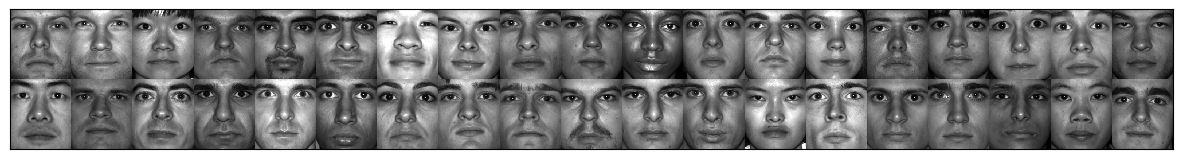

In [202]:
m, n = 19,2
sz = np.array((192, 168)) 
plt.figure(figsize=(15,15))
M = montage(X.loc[np.pad(y.cumsum()[:-1],(1,0)),:], m, n, sz[::-1]).T
plt.imshow(M, cmap=plt.cm.gray , interpolation='nearest')
plt.xticks ([]), plt.yticks ([])
plt.show()

## 可以先做看看，放一部分的人和一部分不放加密解密看看


## 解密五張圖片
目前還寫不太出來
可以試看看
- 把 U 標準化
- X - means

In [204]:
avg_img = np.tile(np.array(X.T.mean(axis=1)).reshape(-1,1), X.shape[0])
X_avg = np.array(X.T) - avg_img

In [205]:
U, S, VT = np.linalg.svd(X_avg, full_matrices=False)

In [206]:
print("U : {}".format(U.shape))
print("S : {}".format(S.shape))
print("VT : {}".format(VT.shape))

U : (32256, 2410)
S : (2410,)
VT : (2410, 2410)


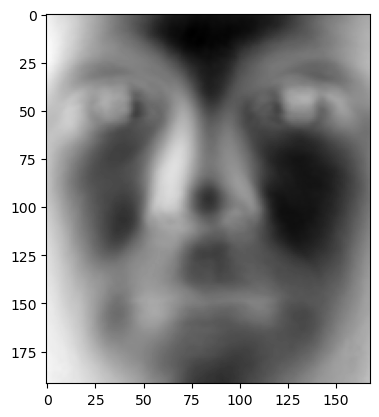

In [207]:
plt.imshow(montage(pd.DataFrame(U.T), 1,1 , sz[::-1]).T, cmap='gray')

In [159]:
U

array([[-4.03120979e-03, -7.93757545e-03,  1.07191489e-02, ...,
        -2.13897522e-03,  3.68109995e-03, -1.47087576e-03],
       [-4.06556801e-03, -7.99731652e-03,  1.07796399e-02, ...,
         6.62864068e-05,  2.72367088e-03, -1.85715489e-04],
       [-4.08377243e-03, -8.00426134e-03,  1.07536039e-02, ...,
         1.52261068e-03, -3.64587229e-06, -1.32422024e-03],
       ...,
       [-2.66683416e-03,  4.63258442e-03,  8.29952939e-03, ...,
         1.81674968e-03, -4.73304878e-03,  5.55442151e-04],
       [-2.71105083e-03,  4.68937502e-03,  8.39072969e-03, ...,
         4.15098207e-03,  7.16612042e-04,  1.14746593e-03],
       [-2.74308925e-03,  4.74049558e-03,  8.43463122e-03, ...,
         4.57995569e-03,  4.88764727e-03,  2.44004335e-03]])

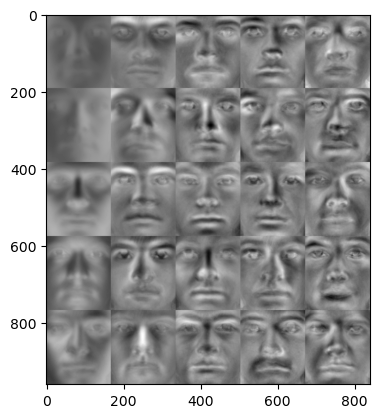

In [208]:
plt.imshow(montage(pd.DataFrame(U.T), 5,5 , sz[::-1]).T, cmap='gray')

In [59]:
q = 2000
Uq = U[:, :q]

In [47]:
encode_data = pd.read_csv(imgfile + r'\五張加密的影像.csv')
print(encode_data.shape)
encode_data.head(5)

(2000, 5)


,No1,No2,No3,No4,No5
0,-120.815967,-127.083042,-89.081239,-111.389301,-86.646668
1,-32.165665,-26.291472,-33.597232,-16.608203,-29.260749
2,10.235471,20.068477,15.352341,23.262589,25.600336
3,-24.833294,-36.443247,-27.678550,-33.440434,-24.704453
4,-2.973631,-0.440829,-3.515939,-1.809990,-8.411470


In [82]:
encode_data.iloc[:,0].min()

-120.8159671996361

In [209]:
Xq = Uq @ np.array(encode_data)

In [210]:
Xq.shape

(32256, 5)

In [211]:
test = montage(pd.DataFrame(Xq.T), 5, 1, sz[::-1])

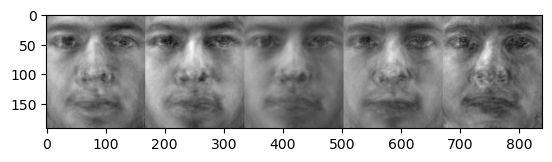

In [212]:
plt.imshow(test.T, cmap=plt.cm.gray)